# Polynomial regression with Tensorflow
Going a little more advanced with regression

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

## Settings

In [18]:
max_order = 3 # the largest polynomial to include in the model
learning_rate = .01
epochs = 500
data_set_size = 50
batch_size = 50
test_set_size = 20
print_every = 50
reg = .01# regularization strength

# range the functions are working over
range_min = -1
range_max = 1

In [19]:
# these are updates/modifications/ utilites based on settings, do not change

num_batches = data_set_size/batch_size
assert data_set_size%batch_size == 0, "The data_set_size must be evely divisible by the batch_size"

# need to increment max_order, becasue of bias, and range() not being inclusive
max_order += 1


## Generate some data

In [20]:
# utility function to generate the data for polynomial regression
# has the option to add noise to the OUTPUTS, so same function can be used in generating inputs and testing the results
# the coeff option makes it easy to apply user specified coeffs for input generation or it can take in the trained weights

def getY(x, coeffs, addNoise = True):
    var = np.random.rand(x.shape[0],max_order)*.5
    
    if not addNoise:
        var = var * 0
        
    print var.shape
    y = np.zeros(x.shape[0])
    
    for ii in range(0,max_order):
        y += coeffs[ii]*x[:,ii]+(var[:,ii]*x[:,ii])
    
    return y

In [21]:
np.random.seed(seed=0)

# set the coefficients for the training data
coeffs = np.random.rand(max_order)

train_x = np.ones((data_set_size,max_order))
xs = np.linspace(range_min,range_max,data_set_size)
for ii in range(1,max_order):
    train_x[:,ii] = xs**ii
train_y = getY(train_x,coeffs,addNoise = True)


test_x = np.ones((test_set_size,max_order))
xs = np.linspace(range_min,range_max,test_set_size)
for ii in range(1,max_order):
    test_x[:,ii] = xs**ii
test_y = getY(test_x,coeffs,addNoise = True)


(50, 4)
(20, 4)


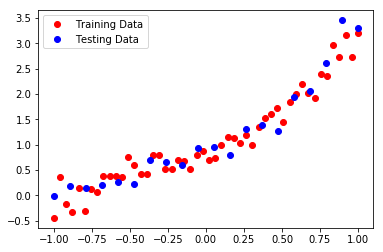

In [22]:
plt.figure()
plt.plot(train_x[:,1],train_y,'ro',label='Training Data')
plt.plot(test_x[:,1],test_y,'bo',label='Testing Data')
plt.legend()
#plt.axis([-5,5,-5,5])


Make the tensorflow placeholders

In [23]:
X = tf.placeholder(tf.float32, shape = [batch_size,max_order])
Y = tf.placeholder(tf.float32, shape = [batch_size])

In [24]:
# setup model weights
W = tf.Variable(tf.random_normal([max_order,1]),name='weight')

In [25]:
# make the model
yhat = tf.squeeze(tf.matmul(X,W))

y_error = tf.subtract(yhat,Y)
cost = tf.divide(tf.reduce_sum(tf.pow(y_error,2)),2*batch_size)
cost = tf.add(cost,reg*tf.matmul(W[1:],W[1:],transpose_a=True))

In [26]:
# set up the optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [27]:
init = tf.global_variables_initializer()

In [28]:
# utility function to compute a batch
# can compute over the optimizer or cost and return the cost if needed
def computeBatch(solveFor):
    x = 0
    for batch in xrange(num_batches):
        batch_start = batch*batch_size
        batch_end = batch_start + batch_size
        temp = sess.run(solveFor, feed_dict={X:train_x[batch_start:batch_end,:],Y:train_y[batch_start:batch_end]})
        if type(temp) is not type(None):
            x += temp
    return x
        

epoch: 0	 cost: [[ 0.09897293]]
epoch: 50	 cost: [[ 0.06712592]]
epoch: 100	 cost: [[ 0.05616406]]
epoch: 150	 cost: [[ 0.05205899]]
epoch: 200	 cost: [[ 0.05025939]]
epoch: 250	 cost: [[ 0.04926991]]
epoch: 300	 cost: [[ 0.04858801]]
epoch: 350	 cost: [[ 0.04803813]]
epoch: 400	 cost: [[ 0.04755502]]
epoch: 450	 cost: [[ 0.04711216]]
epoch: 500	 cost: [[ 0.0466975]]


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:23: RuntimeWarning: divide by zero encountered in log


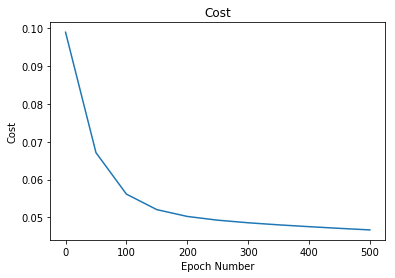

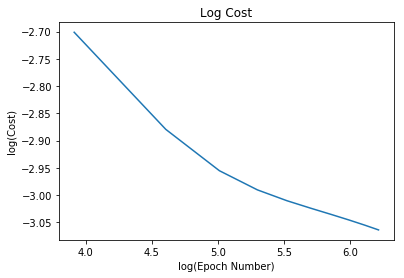

In [29]:
costs = np.array([])

with tf.Session() as sess:
    sess.run(init)

    for epoch in xrange(epochs+1):
        computeBatch(optimizer)
        
        if epoch % print_every == 0:
            c = computeBatch(cost)
            costs = np.append(costs,c)
            print('epoch: {}\t cost: {:}'.format(epoch, computeBatch(cost)))
            
    W_finished = sess.run(W)
            
plt.figure()
plt.plot(np.linspace(0,epochs,epochs/print_every+1),costs)
plt.title('Cost')
plt.xlabel('Epoch Number')
plt.ylabel('Cost')

plt.figure()
plt.plot(np.log(np.linspace(0,epochs,epochs/print_every+1)),np.log(costs))
plt.title('Log Cost')
plt.xlabel('log(Epoch Number)')
plt.ylabel('log(Cost)')

        

In [30]:
pred_y = getY(test_x,W_finished,addNoise = False)

(20, 4)


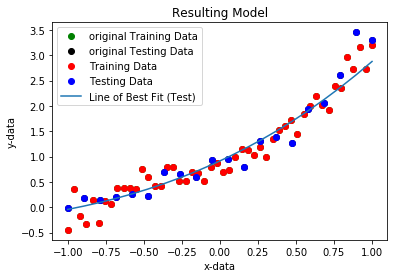

In [31]:
plt.plot(train_x[:,1],train_y,'go',label='original Training Data')
plt.plot(test_x[:,1],test_y,'ko',label='original Testing Data')
plt.plot(train_x[:,1],train_y,'ro',label='Training Data')
plt.plot(test_x[:,1],test_y,'bo',label='Testing Data')
plt.plot(test_x[:,1],pred_y,label='Line of Best Fit (Test)')
plt.title('Resulting Model')
plt.xlabel('x-data')
plt.ylabel('y-data')
plt.legend()

In [32]:
# show the final weights
print W_finished

[[ 0.91380316]
 [ 1.39579332]
 [ 0.50442433]
 [ 0.06432717]]
